In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder , label_binarize

In [2]:

# Importing data
data = pd.read_csv("C:/Users/Malek/Desktop/ML DATA/all_seasons.csv")

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
# Display basic information
def data_overview(data):
    print("Basic Info:")
    print(data.info())
    print("\nMissing Values:")
    print(data.isnull().sum())

data_overview(data)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fixture_id              2545 non-null   int64 
 1   season                  2545 non-null   int64 
 2   date                    2545 non-null   object
 3   stadium                 2545 non-null   object
 4   game_week               2545 non-null   object
 5   home_team               2545 non-null   object
 6   away_team               2545 non-null   object
 7   home_goals              2545 non-null   int64 
 8   away_goals              2545 non-null   int64 
 9   ht_home_goals           2545 non-null   int64 
 10  ht_away_goals           2545 non-null   int64 
 11  home_shots_on_target    2545 non-null   int64 
 12  home_shots              2545 non-null   int64 
 13  home_fouls              2545 non-null   int64 
 14  home_corners            2545 non-null   int6

In [5]:
data.head()

,fixture_id,season,date,stadium,game_week,home_team,away_team,home_goals,away_goals,ht_home_goals,...,away_shots,away_fouls,away_corners,away_offsides,away_possession,away_yellow_cards,away_red_cards,away_goalkeeper_saves,away_attempted_passes,away_successful_passes
0,17696,2016,2016-08-13T11:30:00+00:00,KCOM Stadium,Regular Season - 1,Hull City,Leicester,2,1,1,...,18,17,3,0,51,2,0,3,453,352
1,17691,2016,2016-08-13T14:00:00+00:00,Turf Moor,Regular Season - 1,Burnley,Swansea,0,1,0,...,17,14,4,2,53,2,0,3,383,297
2,17692,2016,2016-08-13T14:00:00+00:00,Selhurst Park,Regular Season - 1,Crystal Palace,West Brom,0,1,0,...,13,15,6,2,38,2,0,4,245,143
3,17693,2016,2016-08-13T14:00:00+00:00,Goodison Park,Regular Season - 1,Everton,Tottenham,1,1,1,...,13,14,6,0,58,0,0,5,483,384
4,17694,2016,2016-08-13T14:00:00+00:00,Riverside,Regular Season - 1,Middlesbrough,Stoke City,1,1,1,...,12,14,6,2,55,5,0,1,420,330


In [6]:
# Feature Engineering
def feature_engineering(data):
    data['result'] = np.where(data['home_goals'] > data['away_goals'], 'Win',
                              np.where(data['home_goals'] < data['away_goals'], 'Lose', 'Draw'))
    data['total_goals'] = data['home_goals'] + data['away_goals']

feature_engineering(data)

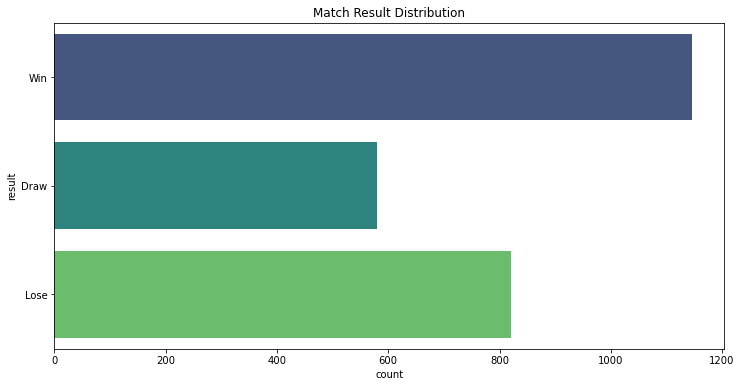

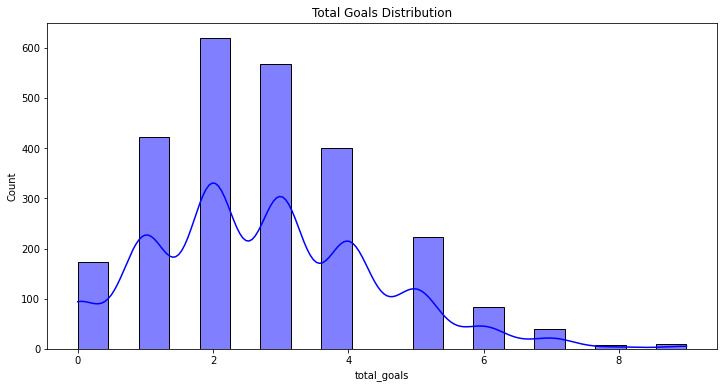

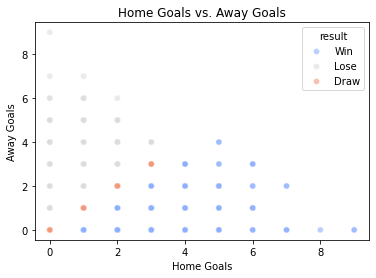

In [7]:
# Visualization
def visualize_results(data):
    plt.figure(figsize=(12, 6))
    sns.countplot(data['result'], order=['Win', 'Draw', 'Lose'], palette='viridis')
    plt.title('Match Result Distribution')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(data['total_goals'], bins=20, kde=True, color='blue')
    plt.title('Total Goals Distribution')
    plt.show()

    sns.scatterplot(data=data, x='home_goals', y='away_goals', alpha=0.6, hue='result', palette='coolwarm')
    plt.title('Home Goals vs. Away Goals')
    plt.xlabel('Home Goals')
    plt.ylabel('Away Goals')
    plt.show()

visualize_results(data)


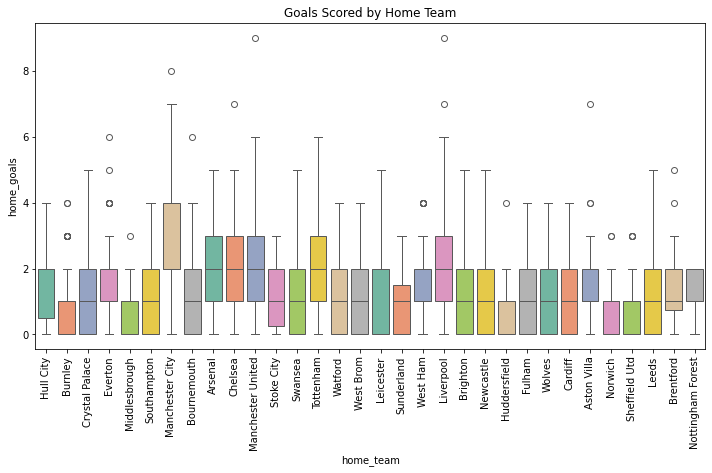

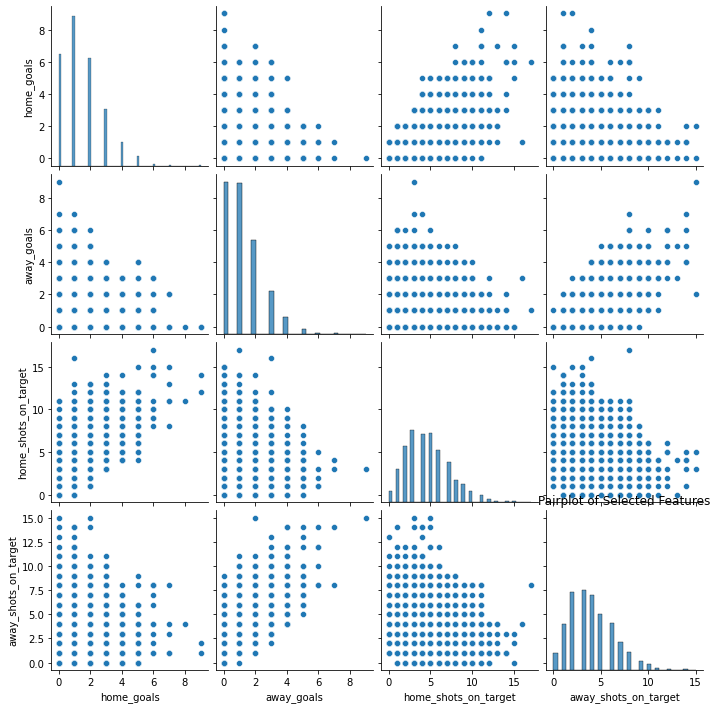

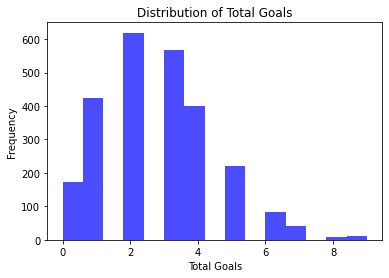

In [8]:
# Additional Visualizations
def advanced_visualizations(data):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='home_team', y='home_goals', palette='Set2')
    plt.xticks(rotation=90)
    plt.title('Goals Scored by Home Team')
    plt.show()

    sns.pairplot(data[['home_goals', 'away_goals', 'home_shots_on_target', 'away_shots_on_target']])
    plt.title('Pairplot of Selected Features')
    plt.show()

    plt.hist(data['total_goals'], bins=15, color='blue', alpha=0.7)
    plt.xlabel('Total Goals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Total Goals')
    plt.show()

advanced_visualizations(data)

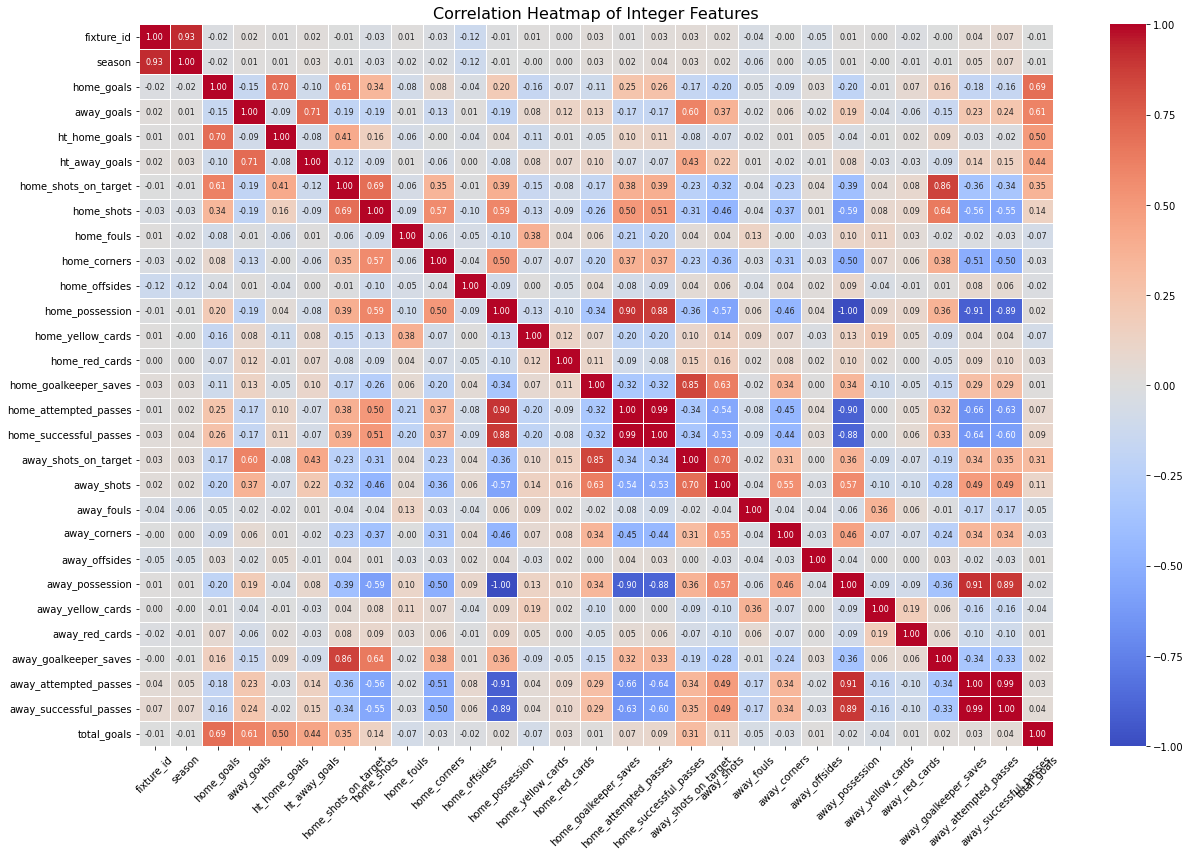

In [9]:
# Filter for integer columns only
int_columns = data.select_dtypes(include=['int64']).columns
int_data = data[int_columns]

# Plot the correlation heatmap
plt.figure(figsize=(18, 12))  # Adjust size for better visibility
sns.heatmap(int_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=0.5)
plt.title('Correlation Heatmap of Integer Features', fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

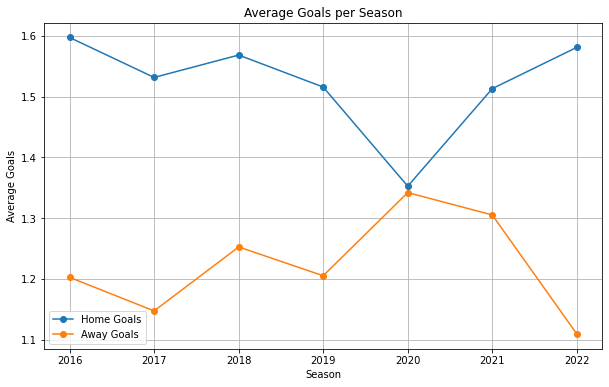

In [10]:
season_avg_goals = data.groupby('season')[['home_goals', 'away_goals']].mean()
season_avg_goals.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Goals per Season')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.legend(['Home Goals', 'Away Goals'])
plt.grid()
plt.show()

In [11]:
data.drop(['date'], axis=1, inplace=True)
def get_recent_form(data, team, n_matches=5):
    team_data = data[(data['home_team'] == team) | (data['away_team'] == team)].tail(n_matches)
    wins = 0
    draws = 0
    losses = 0
    for _, row in team_data.iterrows():
        if row['result'] == 'Win' and row['home_team'] == team:
            wins += 1
        elif row['result'] == 'Lose' and row['away_team'] == team:
            wins += 1
        elif row['result'] == 'Draw':
            draws += 1
        else:
            losses += 1

    return wins / n_matches, draws / n_matches, losses / n_matches

In [12]:
scaling_factor = 2

data['home_recent_wins'] = data['home_team'].apply(lambda x: get_recent_form(data, x)[0]) * scaling_factor
data['home_recent_draws'] = data['home_team'].apply(lambda x: get_recent_form(data, x)[1]) * scaling_factor
data['home_recent_losses'] = data['home_team'].apply(lambda x: get_recent_form(data, x)[2]) * scaling_factor
data['away_recent_wins'] = data['away_team'].apply(lambda x: get_recent_form(data, x)[0]) * scaling_factor
data['away_recent_draws'] = data['away_team'].apply(lambda x: get_recent_form(data, x)[1]) * scaling_factor
data['away_recent_losses'] = data['away_team'].apply(lambda x: get_recent_form(data, x)[2]) * scaling_factor
data.head()

,fixture_id,season,stadium,game_week,home_team,away_team,home_goals,away_goals,ht_home_goals,ht_away_goals,...,away_attempted_passes,away_successful_passes,result,total_goals,home_recent_wins,home_recent_draws,home_recent_losses,away_recent_wins,away_recent_draws,away_recent_losses
0,17696,2016,KCOM Stadium,Regular Season - 1,Hull City,Leicester,2,1,1,0,...,453,352,Win,3,0.4,0.4,1.2,0.4,0.0,1.6
1,17691,2016,Turf Moor,Regular Season - 1,Burnley,Swansea,0,1,0,0,...,383,297,Lose,1,0.4,0.4,1.2,0.0,0.0,2.0
2,17692,2016,Selhurst Park,Regular Season - 1,Crystal Palace,West Brom,0,1,0,0,...,245,143,Lose,1,0.0,0.8,1.2,0.0,0.4,1.6
3,17693,2016,Goodison Park,Regular Season - 1,Everton,Tottenham,1,1,1,0,...,483,384,Draw,2,0.8,0.4,0.8,1.2,0.0,0.8
4,17694,2016,Riverside,Regular Season - 1,Middlesbrough,Stoke City,1,1,1,0,...,420,330,Draw,2,0.4,0.4,1.2,0.4,1.2,0.4


In [13]:
le_home = LabelEncoder()
le_away = LabelEncoder()
le_game_week = LabelEncoder()
data['home_team'] = le_home.fit_transform(data['home_team'])
data['away_team'] = le_away.fit_transform(data['away_team'])
data['game_week'] = le_game_week.fit_transform(data['game_week'])

In [14]:
# Section 6: Split Data
def split_data(data):
    latest_season = data['season'].max()
    train_data = data[data['season'] != latest_season]
    test_data = data[data['season'] == latest_season]
    return train_data, test_data

train_data, test_data = split_data(data)

In [15]:

# Section 7: Define Features and Targets
def define_features_targets(train_data, test_data):
    features = [
    'game_week',
    'home_team',
    'away_team',
    'home_shots_on_target',
    'home_shots',
    'home_fouls',
    'home_corners',
    'home_offsides',
    'home_possession',
    'home_yellow_cards',
    'home_red_cards',
    'home_goalkeeper_saves',
    'home_attempted_passes',
    'home_successful_passes',
    'away_shots_on_target',
    'away_shots',
    'away_fouls',
    'away_corners',
    'away_offsides',
    'away_possession',
    'away_yellow_cards',
    'away_red_cards',
    'away_goalkeeper_saves',
    'away_attempted_passes',
    'away_successful_passes',
    'home_recent_wins',
    'home_recent_draws',
    'home_recent_losses',
    'away_recent_wins',
    'away_recent_draws',
    'away_recent_losses'
    ]
    X_train = train_data[features]
    X_test = test_data[features]

    target_encoder = LabelEncoder()
    y_train_result = target_encoder.fit_transform(train_data['result'])
    y_test_result = target_encoder.transform(test_data['result'])
    y_train_goals = train_data['total_goals']
    y_test_goals = test_data['total_goals']

    return X_train, X_test, y_train_result, y_test_result, y_train_goals, y_test_goals, target_encoder

X_train, X_test, y_train_result, y_test_result, y_train_goals, y_test_goals, target_encoder = define_features_targets(train_data, test_data)

Results for GradientBoostingClassifier - Classification:
Accuracy: 0.7547169811320755
F1 Score: 0.7466212922486687
Precision: 0.743290033479166
Recall: 0.7547169811320755
              precision    recall  f1-score   support

        Draw       0.57      0.45      0.50        62
        Lose       0.77      0.79      0.78        77
         Win       0.81      0.88      0.84       126

    accuracy                           0.75       265
   macro avg       0.72      0.71      0.71       265
weighted avg       0.74      0.75      0.75       265



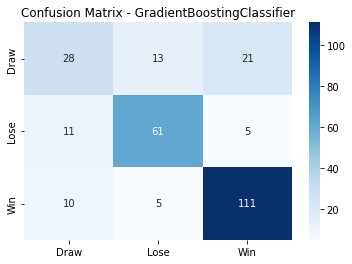

Results for RandomForestClassifier - Classification:
Accuracy: 0.6528301886792452
F1 Score: 0.606283479345539
Precision: 0.6234312062751749
Recall: 0.6528301886792452
              precision    recall  f1-score   support

        Draw       0.50      0.13      0.21        62
        Lose       0.62      0.71      0.66        77
         Win       0.69      0.87      0.77       126

    accuracy                           0.65       265
   macro avg       0.60      0.57      0.55       265
weighted avg       0.62      0.65      0.61       265



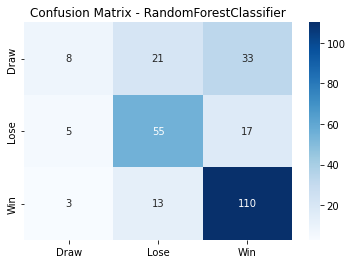

Results for DecisionTreeClassifier - Classification:
Accuracy: 0.6226415094339622
F1 Score: 0.6139209011671395
Precision: 0.6078507810354239
Recall: 0.6226415094339622
              precision    recall  f1-score   support

        Draw       0.36      0.29      0.32        62
        Lose       0.64      0.68      0.66        77
         Win       0.71      0.75      0.73       126

    accuracy                           0.62       265
   macro avg       0.57      0.57      0.57       265
weighted avg       0.61      0.62      0.61       265



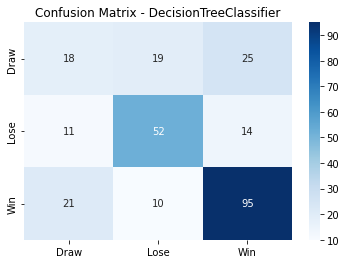

Results for LogisticRegression - Classification:
Accuracy: 0.8188679245283019
F1 Score: 0.8188482327338437
Precision: 0.8191359871145882
Recall: 0.8188679245283019
              precision    recall  f1-score   support

        Draw       0.63      0.63      0.63        62
        Lose       0.86      0.90      0.88        77
         Win       0.89      0.87      0.88       126

    accuracy                           0.82       265
   macro avg       0.79      0.80      0.79       265
weighted avg       0.82      0.82      0.82       265



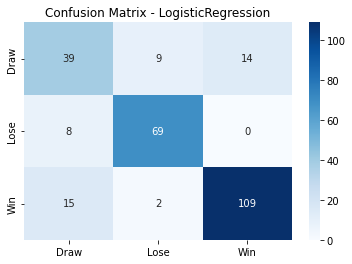

Results for XGBClassifier - Classification:
Accuracy: 0.7509433962264151
F1 Score: 0.7440983515067479
Precision: 0.7404516349355417
Recall: 0.7509433962264151
              precision    recall  f1-score   support

        Draw       0.53      0.44      0.48        62
        Lose       0.75      0.82      0.78        77
         Win       0.84      0.87      0.85       126

    accuracy                           0.75       265
   macro avg       0.71      0.71      0.70       265
weighted avg       0.74      0.75      0.74       265



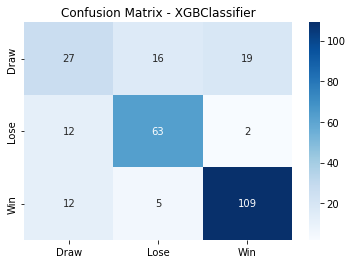

In [16]:
# Section 8: Classification Modeling and Evaluation
from xgboost import XGBClassifier

def train_and_evaluate_classification(models, X_train, y_train, X_test, y_test, target_encoder):
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(f"Results for {type(model).__name__} - Classification:")
        print("Accuracy:", accuracy_score(y_test, predictions))
        print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
        print("Precision:", precision_score(y_test, predictions, average='weighted'))
        print("Recall:", recall_score(y_test, predictions, average='weighted'))
        print(classification_report(y_test, predictions, target_names=target_encoder.classes_))
        cm = confusion_matrix(y_test, predictions, labels=np.arange(len(target_encoder.classes_)))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
        plt.title(f'Confusion Matrix - {type(model).__name__}')
        plt.show()



classification_models = [
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    LogisticRegression(random_state=42, max_iter=1000),
    XGBClassifier(random_state=42, max_depth=3),

]



train_and_evaluate_classification(classification_models, X_train, y_train_result, X_test, y_test_result, target_encoder)


Evaluating GradientBoostingRegressor - Regression:
Mean Squared Error: 0.6232151551042046
R-squared Score: 0.7932049166153549
Mean Absolute Error: 0.5829387012853811


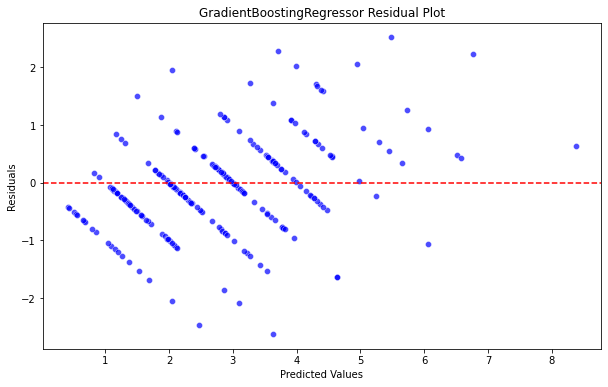

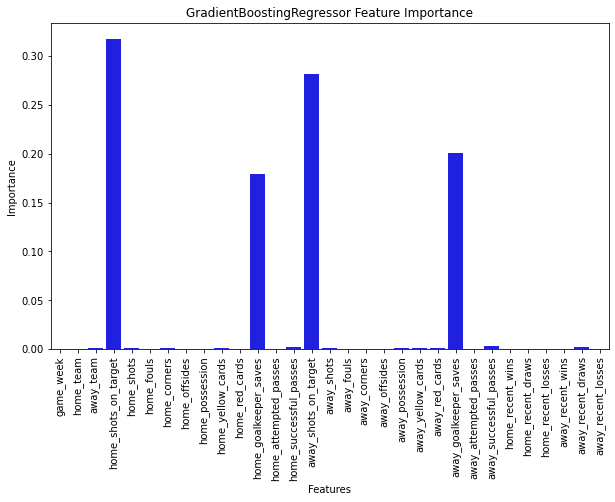

Evaluating RandomForestRegressor - Regression:
Mean Squared Error: 1.0245083018867926
R-squared Score: 0.6600479337163809
Mean Absolute Error: 0.783433962264151


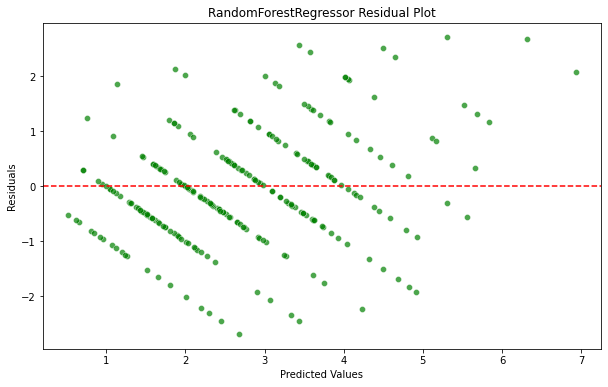

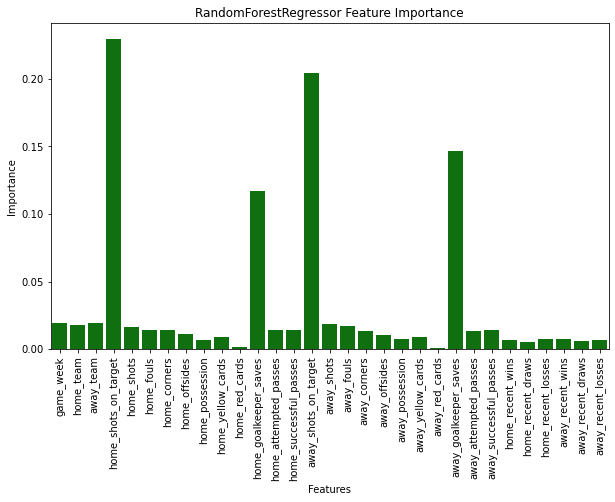

Evaluating DecisionTreeRegressor - Regression:
Mean Squared Error: 1.8641509433962264
R-squared Score: 0.38143794061501823
Mean Absolute Error: 0.9811320754716981


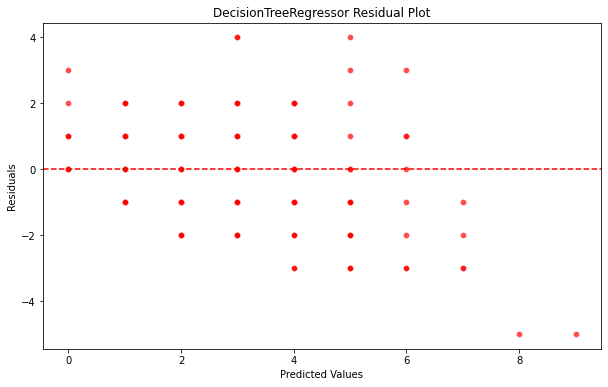

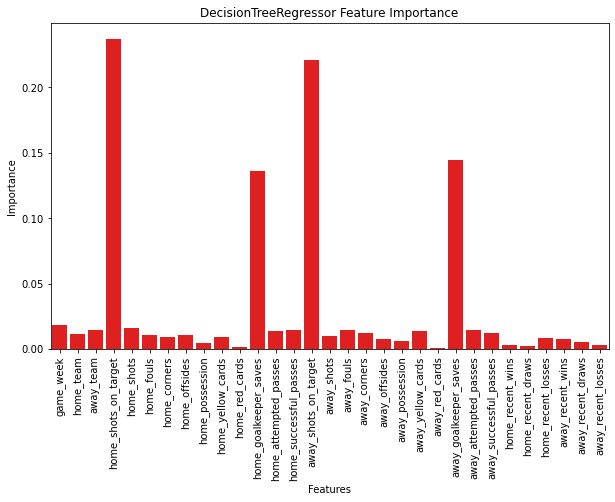

Evaluating LogisticRegression - Regression:
Mean Squared Error: 1.5207547169811322
R-squared Score: 0.49538358313330433
Mean Absolute Error: 0.9320754716981132


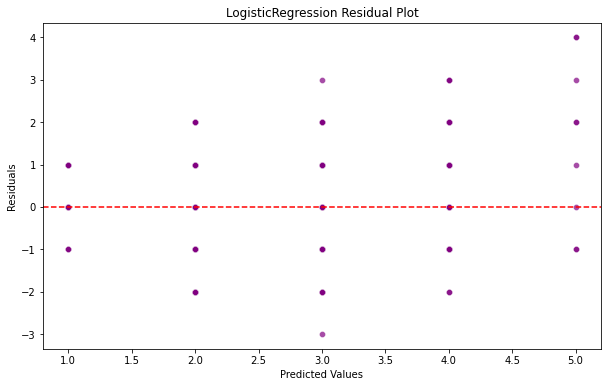

Evaluating XGBRegressor - Regression:
Mean Squared Error: 0.5313237108287723
R-squared Score: 0.8236963106798912
Mean Absolute Error: 0.5174230480531476


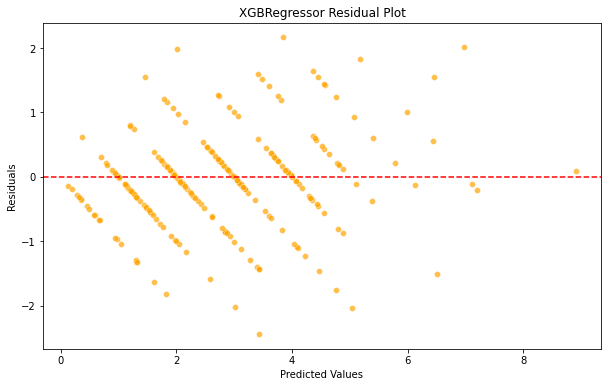

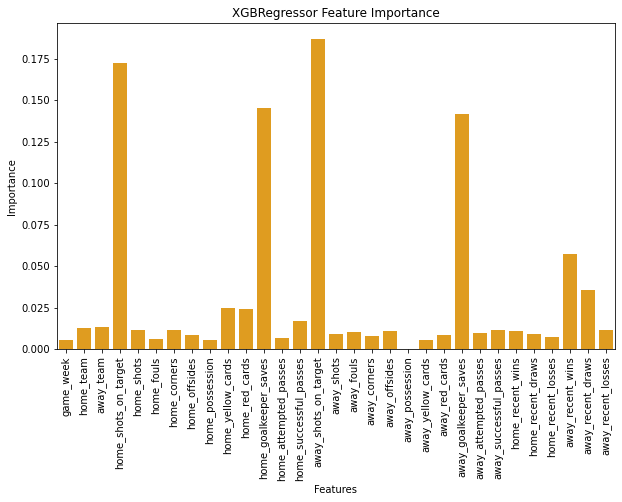

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_regression(models, X_train, y_train, X_test, y_test):
    colors = ['blue', 'green', 'red', 'purple','orange']  # Color mapping for models

    for i, model in enumerate(models):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        print(f"Evaluating {type(model).__name__} - Regression:")

        # Mean Squared Error
        mse = mean_squared_error(y_test, predictions)
        print("Mean Squared Error:", mse)

        # R-squared Score
        r2 = r2_score(y_test, predictions)
        print("R-squared Score:", r2)

        # Mean Absolute Error
        mae = mean_absolute_error(y_test, predictions)
        print("Mean Absolute Error:", mae)

        # Residual Plot
        residuals = y_test - predictions
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=predictions, y=residuals, color=colors[i], alpha=0.7)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title(f'{type(model).__name__} Residual Plot')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.show()


        # Feature Importance Plot (for models that support it)
        if hasattr(model, 'feature_importances_'):
            plt.figure(figsize=(10, 6))
            sns.barplot(x=range(len(X_train.columns)), y=model.feature_importances_, color=colors[i])
            plt.title(f'{type(model).__name__} Feature Importance')
            plt.xlabel('Features')
            plt.ylabel('Importance')
            plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=90)
            plt.show()





# Example usage
regression_models = [
    GradientBoostingRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    LogisticRegression(random_state=42, max_iter=1000),
    XGBRegressor(random_state=42, max_depth=3)
    ]
train_and_evaluate_regression(regression_models, X_train, y_train_goals, X_test, y_test_goals)




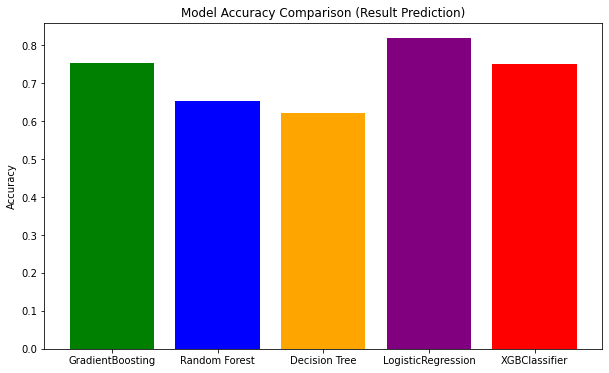

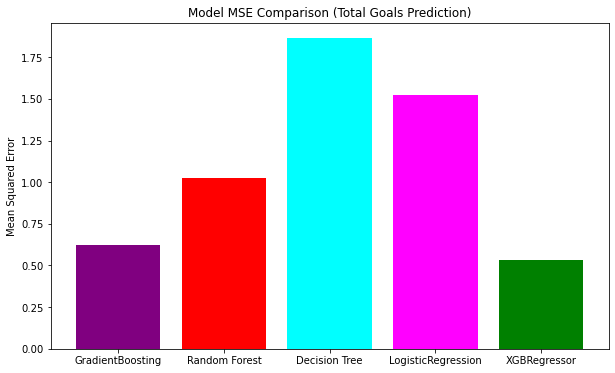

In [18]:
# Section 10: Comparison Plots
def comparison_plots(result_metrics, regression_metrics):
    plt.figure(figsize=(10, 6))
    plt.bar(result_metrics.keys(), result_metrics.values(), color=['green', 'blue', 'orange', 'purple','red'])
    plt.title('Model Accuracy Comparison (Result Prediction)')
    plt.ylabel('Accuracy')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(regression_metrics.keys(), regression_metrics.values(), color=['purple', 'red', 'cyan', 'magenta','green'])
    plt.title('Model MSE Comparison (Total Goals Prediction)')
    plt.ylabel('Mean Squared Error')
    plt.show()

result_metrics = {
    "GradientBoosting": accuracy_score(y_test_result, classification_models[0].predict(X_test)),
    "Random Forest": accuracy_score(y_test_result, classification_models[1].predict(X_test)),
    "Decision Tree": accuracy_score(y_test_result, classification_models[2].predict(X_test)),
    "LogisticRegression": accuracy_score(y_test_result, classification_models[3].predict(X_test)),
    "XGBClassifier": accuracy_score(y_test_result, classification_models[4].predict(X_test))

}

regression_metrics = {
    "GradientBoosting": mean_squared_error(y_test_goals, regression_models[0].predict(X_test)),
    "Random Forest": mean_squared_error(y_test_goals, regression_models[1].predict(X_test)),
    "Decision Tree": mean_squared_error(y_test_goals, regression_models[2].predict(X_test)),
    "LogisticRegression": mean_squared_error(y_test_goals, regression_models[3].predict(X_test)),
    "XGBRegressor": mean_squared_error(y_test_goals, regression_models[4].predict(X_test))

}

comparison_plots(result_metrics, regression_metrics)


In [19]:
def head_to_head(data, team1, team2):
    matches = data[((data['home_team'] == le_home.transform([team1])[0]) &
                    (data['away_team'] == le_away.transform([team2])[0])) |
                   ((data['home_team'] == le_home.transform([team2])[0]) &
                    (data['away_team'] == le_away.transform([team1])[0]))]

    print(f"Head-to-head results between {team1} and {team2}:")
    for _, match in matches.iterrows():
        home_team = le_home.inverse_transform([match['home_team']])[0]
        away_team = le_away.inverse_transform([match['away_team']])[0]
        print(f"{home_team} {match['home_goals']} - {match['away_goals']} {away_team}")
    print()

# Example
head_to_head(data, 'Arsenal', 'Southampton')




Head-to-head results between Arsenal and Southampton:
Arsenal 2 - 1 Southampton
Southampton 0 - 2 Arsenal
Southampton 1 - 1 Arsenal
Arsenal 3 - 2 Southampton
Southampton 3 - 2 Arsenal
Arsenal 2 - 0 Southampton
Arsenal 2 - 2 Southampton
Southampton 0 - 2 Arsenal
Arsenal 1 - 1 Southampton
Southampton 1 - 3 Arsenal
Arsenal 3 - 0 Southampton
Southampton 1 - 0 Arsenal
Southampton 1 - 1 Arsenal



In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoders
le_home = LabelEncoder()
le_away = LabelEncoder()

# Sample data to fit the encoders (you should fit these with the actual teams in your dataset)
team_names = ['Arsenal', 'Southampton', 'Fulham', 'Leeds', 'Manchester United', 'Chelsea', 'Crystal Palace', 'Everton', 'Liverpool', 'Nottingham Forest', 'Brentford', 'Aston Villa', 'Leicester', 'Wolves', 'Brighton', 'Manchester City', 'Newcastle', 'Tottenham', 'Bournemouth', 'West Ham']
le_home.fit(team_names)
le_away.fit(team_names)

# Your predict_outcome function
def predict_outcome(home_team, away_team):
    home_recent_wins, home_recent_draws, home_recent_losses = get_recent_form(data, le_home.transform([home_team])[0])
    away_recent_wins, away_recent_draws, away_recent_losses = get_recent_form(data, le_away.transform([away_team])[0])

    input_data = np.array([[
        1, le_home.transform([home_team])[0], le_away.transform([away_team])[0]] + [0] * 22 +
        [home_recent_wins * scaling_factor, home_recent_draws * scaling_factor, home_recent_losses * scaling_factor,
         away_recent_wins * scaling_factor, away_recent_draws * scaling_factor, away_recent_losses * scaling_factor]
    ])
    clf = LogisticRegression(random_state=42, max_iter=1000)
    clf.fit(X_train, y_train_result)
    prediction = clf.predict(input_data)[0]
    probabilities = clf.predict_proba(input_data)[0]

    return prediction, probabilities

In [21]:
fixtures = [
    ['Arsenal', 'Southampton'],
    ['Fulham', 'Leeds'],
    ['Manchester United', 'Chelsea'],
    ['Crystal Palace', 'Everton'],
    ['Liverpool', 'Nottingham Forest'],
    ['Brentford', 'Aston Villa'],
    ['Leicester', 'Wolves'],
    ['Brighton', 'Manchester City'],
    ['Newcastle', 'Tottenham'],
    ['Bournemouth', 'West Ham'],
    ]

for fixture in fixtures:
    home_team = fixture[0]
    away_team = fixture[1]
    prediction, probabilities = predict_outcome(home_team, away_team)

    print(f"{home_team} (Home) Win - {probabilities[2] * 100:.2f}%")
    print(f"{away_team} (Away) Win - {probabilities[0] * 100:.2f}%")
    print(f"Draw - {probabilities[1] * 100:.2f}%\n")

Arsenal (Home) Win - 44.29%
Southampton (Away) Win - 30.10%
Draw - 25.60%

Fulham (Home) Win - 21.30%
Leeds (Away) Win - 32.14%
Draw - 46.56%

Manchester United (Home) Win - 43.08%
Chelsea (Away) Win - 26.28%
Draw - 30.63%

Crystal Palace (Home) Win - 40.01%
Everton (Away) Win - 24.15%
Draw - 35.84%

Liverpool (Home) Win - 15.11%
Nottingham Forest (Away) Win - 32.62%
Draw - 52.27%

Brentford (Home) Win - 29.32%
Aston Villa (Away) Win - 35.92%
Draw - 34.76%

Leicester (Home) Win - 37.11%
Wolves (Away) Win - 31.00%
Draw - 31.90%

Brighton (Home) Win - 43.90%
Manchester City (Away) Win - 32.73%
Draw - 23.37%

Newcastle (Home) Win - 25.61%
Tottenham (Away) Win - 26.91%
Draw - 47.48%

Bournemouth (Home) Win - 43.84%
West Ham (Away) Win - 23.81%
Draw - 32.35%



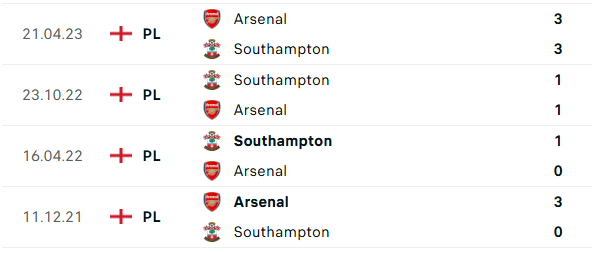

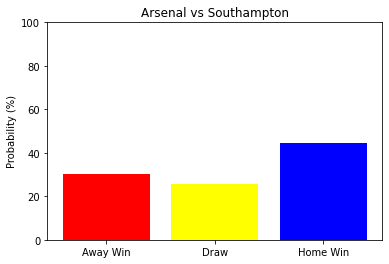

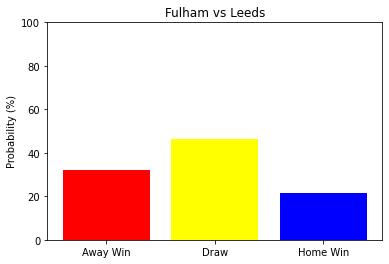

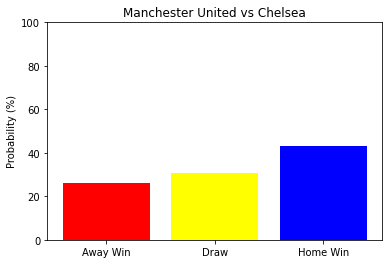

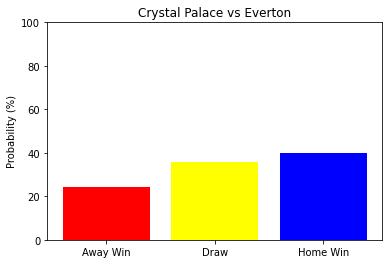

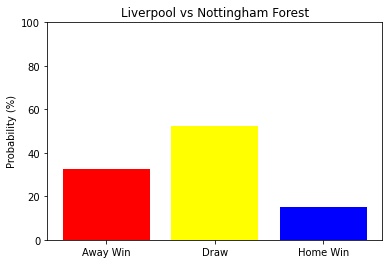

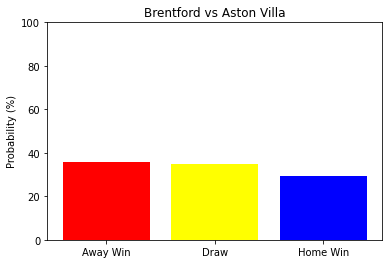

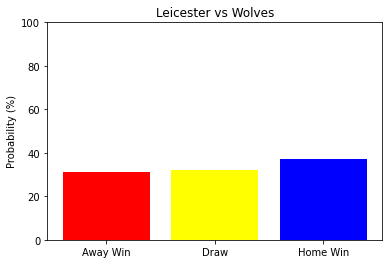

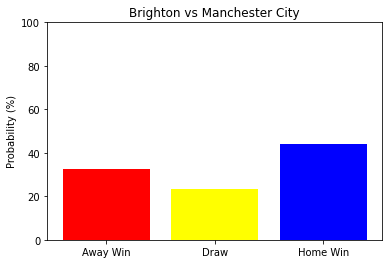

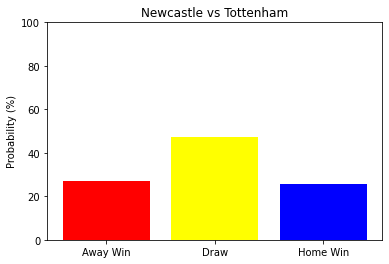

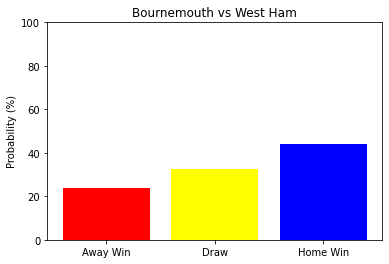

In [22]:
# Visualize probabilities for each match
for fixture in fixtures:
    home_team = fixture[0]
    away_team = fixture[1]
    prediction, probabilities = predict_outcome(home_team, away_team)

    labels = ['Away Win', 'Draw', 'Home Win']
    plt.bar(labels, probabilities * 100, color=['red', 'yellow', 'blue'])
    plt.title(f"{home_team} vs {away_team}")
    plt.ylabel("Probability (%)")
    plt.ylim(0, 100)
    plt.show()


In [23]:
def predict_new_input_xgb(model_home, model_away, input_data, home_team, away_team, le_home, le_away):
    # Encoder les variables catégorielles (home_team et away_team)
    input_data['home_team'] = le_home.transform([home_team])[0]
    input_data['away_team'] = le_away.transform([away_team])[0]

    # Prédire les buts marqués par l'équipe à domicile
    predicted_home_goals = model_home.predict(input_data)
    predicted_home_goals = max(0, round(predicted_home_goals[0]))  # Assurer des résultats non négatifs et arrondir

    # Prédire les buts marqués par l'équipe à l'extérieur
    predicted_away_goals = model_away.predict(input_data)
    predicted_away_goals = max(0, round(predicted_away_goals[0]))  # Assurer des résultats non négatifs et arrondir

    # Décoder les équipes pour obtenir leurs vrais noms
    home_team_decoded = le_home.inverse_transform([input_data['home_team']])[0]
    away_team_decoded = le_away.inverse_transform([input_data['away_team']])[0]

    # Formater le résultat
    result = f"{home_team_decoded} {predicted_home_goals} - {predicted_away_goals} {away_team_decoded}"
    return result

# Exemple de nouvelles données avec des équipes réelles
new_input_data = {
    'game_week': 12,
    'home_team': 'Manchester United',
    'away_team': 'Chelsea',
    'home_shots_on_target': 5,
    'home_shots': 15,
    'home_fouls': 10,
    'home_corners': 6,
    'home_offsides': 2,
    'home_possession': 60,
    'home_yellow_cards': 1,
    'home_red_cards': 0,
    'home_goalkeeper_saves': 3,
    'home_attempted_passes': 450,
    'home_successful_passes': 400,
    'away_shots_on_target': 3,
    'away_shots': 10,
    'away_fouls': 12,
    'away_corners': 3,
    'away_offsides': 1,
    'away_possession': 40,
    'away_yellow_cards': 2,
    'away_red_cards': 0,
    'away_goalkeeper_saves': 4,
    'away_attempted_passes': 300,
    'away_successful_passes': 250,
    'home_recent_wins': 3,
    'home_recent_draws': 1,
    'home_recent_losses': 1,
    'away_recent_wins': 2,
    'away_recent_draws': 1,
    'away_recent_losses': 2,
}

# Convertir les nouvelles données en DataFrame
new_input_df = pd.DataFrame([new_input_data])

# Entraînement de deux modèles XGBRegressor : un pour les équipes à domicile et un pour les équipes à l'extérieur
xgb_model_home = XGBRegressor(random_state=42, max_depth=3)
xgb_model_home.fit(X_train,  y_train_goals)

xgb_model_away = XGBRegressor(random_state=42, max_depth=3)
xgb_model_away.fit(X_train,  y_train_goals)

# Prédire et afficher le résultat
home_team = new_input_data['home_team']
away_team = new_input_data['away_team']
prediction = predict_new_input_xgb(xgb_model_home, xgb_model_away, new_input_df, home_team, away_team, le_home, le_away)
print(prediction)

Manchester United 1 - 1 Chelsea


In [ ]:
from flask import Flask, request, jsonify
import numpy as np
from flask_cors import CORS  # Import CORS


app = Flask(__name__)
CORS(app) 


@app.route('/predict', methods=['POST'])
def predict():
    home_team = request.args.get('home_team')
    away_team = request.args.get('away_team')

    if not home_team or not away_team:
        return "Missing home_team or away_team parameter", 400

    prediction, probabilities = predict_outcome(home_team, away_team)

    # Convert NumPy types to native Python types
    return jsonify({
        'home_team': home_team,
        'away_team': away_team,
        'prediction': int(prediction),  # Convert to int if needed
        'home_win_probability': float(probabilities[2]) * 100,  # Convert to float
        'away_win_probability': float(probabilities[0]) * 100,  # Convert to float
        'draw_probability': float(probabilities[1]) * 100  # Convert to float
    })

if __name__ == '__main__':
    app.run(debug=False)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [18/Dec/2024 12:41:57] "OPTIONS /predict?home_team=Fulham&away_team=Nottingham%20Forest HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2024 12:42:03] "POST /predict?home_team=Fulham&away_team=Nottingham%20Forest HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2024 12:46:40] "OPTIONS /predict?home_team=Brentford&away_team=Southampton HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2024 12:46:45] "POST /predict?home_team=Brentford&away_team=Southampton HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2024 12:46:51] "OPTIONS /predict?home_team=Liverpool&away_team=Chelsea HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2024 12:46:56] "POST /predict?home_team=Liverpool&away_team=Chelsea HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2024 12:51:45] "OPTIONS /predict?home_team=Brentford&away_team=Aston%20Villa HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2024 12:51:50] "POST /predict?home_team=Brentford&away_team=Aston%20Villa HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2024 13:16:22] "OPTI